In [1]:
import pandas as pd
import numpy as np
data = {
    'Brand': ['HomeStyle', 'LuxDecor', 'ModernLiving', 'EcoHome', 'ClassicDesigns',
              'UrbanNest', 'NaturalHabitat', 'ChicInteriors', 'RusticCharm', 'MinimalistMood'],
    'Product Category': ['Living Room Furniture', 'Wall Art', 'Contemporary Lighting',
                         'Sustainable Decor', 'Traditional Furniture', 'Compact Furniture',
                         'Organic Textiles', 'Designer Accessories', 'Farmhouse Decor',
                         'Scandinavian Design'],
    'Price ($)': [599.99, 249.50, 349.75, 179.99, 799.99,
                  299.50, 129.99, 89.99, 199.75, 449.99],
    'Sales Volume': [1200, 850, 670, 1500, 450,
                     1100, 2000, 3500, 980, 650],
    'Total Revenue ($)': [719988, 212075, 234432.50, 269985, 359995.50,
                          329450, 259980, 314965, 195755, 292993.50],
    'Customer Segment': ['Urban Professional', 'Suburban Family', 'Urban Minimalist',
                         'Eco-Conscious', 'Luxury Segment', 'Urban Professional',
                         'Eco-Conscious', 'Urban Minimalist', 'Suburban Family',
                         'Urban Professional'],
    'Region': ['North', 'East', 'West', 'South', 'Midwest',
               'North', 'West', 'East', 'Midwest', 'South'],
    'Season': ['Winter', 'Spring', 'Summer', 'Fall', 'Winter',
               'Spring', 'Summer', 'Fall', 'Winter', 'Spring']
}
df = pd.DataFrame(data)

df['Profit Margin (%)'] = np.random.uniform(10, 35, len(df))
df['Market Share (%)'] = np.random.uniform(5, 20, len(df))

df.to_excel('Home_Decor_Market_Data.xlsx', index=False)

print("Excel file 'Home_Decor_Market_Data.xlsx' has been generated successfully!")

Excel file 'Home_Decor_Market_Data.xlsx' has been generated successfully!



Top Competitors Analysis:
 Original Brand
HomeStyle         719988.0
ClassicDesigns    359995.5
UrbanNest         329450.0
ChicInteriors     314965.0
MinimalistMood    292493.5
Name: Total Revenue, dtype: float64


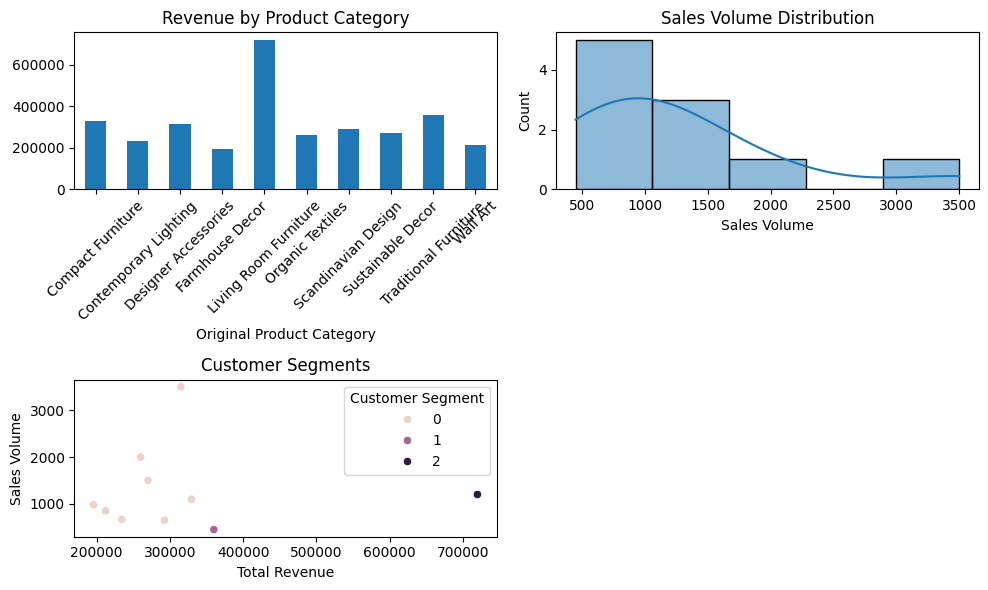

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
def load_and_preprocess_data(file_path):
    df = pd.read_excel(file_path)
    df = df.dropna()
    df['Total Revenue'] = df['Price ($)'] * df['Sales Volume']
    df['Original Brand'] = df['Brand']
    df['Original Product Category'] = df['Product Category']
    df = pd.get_dummies(df, columns=['Product Category', 'Brand'])
    return df
def identifytopcompetitor(df, top_n=5):
    return df.groupby('Original Brand')['Total Revenue'].sum().nlargest(top_n)
def customer_seg(df):
    X = df[['Total Revenue', 'Price ($)', 'Sales Volume']]
    X_scaled = StandardScaler().fit_transform(X)
    df['Customer Segment'] = KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled)
    return df
def markettrends(df):
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)
    df.groupby('Original Product Category')['Total Revenue'].sum().plot(kind='bar', title='Revenue by Product Category')
    plt.xticks(rotation=45)
    plt.subplot(2, 2, 2)
    sns.histplot(df['Sales Volume'], kde=True)
    plt.title('Sales Volume Distribution')
    plt.subplot(2, 2, 3)
    sns.scatterplot(x='Total Revenue', y='Sales Volume', hue='Customer Segment', data=df)
    plt.title('Customer Segments')
    plt.tight_layout()
    plt.show()
def main():
    df = load_and_preprocess_data('Home_Decor_Market_Data.xlsx')
    print("\nTop Competitors Analysis:\n", identifytopcompetitor(df))
    df = customer_seg(df)
    markettrends(df)
if __name__ == "__main__":
    main()